<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Descent**

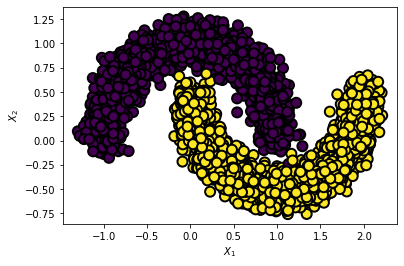

정확도 평균: 0.80812,표준편차: 0.07589983926201688


In [ ]:
import numpy as np#벡터 및 행렬 연산
import matplotlib.pyplot as plt#그래프로 시각화
from sklearn.datasets import make_moons#초승달 데이터
from sklearn.model_selection import train_test_split#학습데이터 테스트데이터 분리

n_samples=5000#데이터 개수
minibatch_size=50#미니 배치 크기

n_feature=2
n_class=2#분류 개수
X,y=make_moons(n_samples=5000,random_state=42,noise=0.1)#샘플5000개,노이즈에 대한 난수생성 42개,노이즈 표준편차 0.1
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100,edgecolor='k',linewidth=2)#x,y축 산점도 표현
plt.xlabel("$X_1$")#x축 라벨 설정
plt.ylabel("$X_2$")#y축 라벨 설정
plt.show()#그래프 출력

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)#학습데이터,테스트 데이터 75%,25%로 나눔,난수 발생 seed인자값:42

def make_network(n_hidden=100):#표준 정규 랜덤 변수로 가중치 초기화
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):#softmax계산 함수
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']#은닉층 입력
  h[h<0]=0# ReLU 비선형성
  prob=softmax(h@model['w2'])#은닉층에서 출력층으로 출력
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs# err:미니 배치에 대한 출력 계층의 그레이디언트
  #은닉층의 그래디언트 구함
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)# forward정보

    #참 라벨 확률 분포 생성 
    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred # 출력 계층의 그래디언트 계산
    # 미니배치 정보 축적
    xs.append(x) # x: 입력
    hs.append(h) # h: 은닉층 상태
    errs.append(err)# err: 출력 계층의 그레이디언트

  return backward(model,np.array(xs),np.array(hs),np.array(errs))# 현재 미니배치에서 얻은 정보를 활용한 Backprop 

def shuffle(X,y):
  indices=np.arange(X.shape[0])#배열 생성
  np.random.shuffle(indices)#랜덤 값 생성
  X=X[indices]#랜덤x값
  y=y[indices]#랜덤y값
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)#랜덤 값 생성

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]#샘플수를 미니배치 크기로
    y_mini=y[i:i+minibatch_size]#샘플수를 미니배치 크기로
    minibatches.append((X_mini,y_mini))

  return minibatches

def GradientDescent(model,X_train,y_train,minibatch_size,eta=1e-4):
  minibatches=get_minibatch(X_train,y_train,minibatch_size)#미니배치 네트워크 각 계층의 그래디언트 얻음
  for idx in range(0,n_iteration):
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트
    grad=get_minibatch_grad(model,X_mini,y_mini)#특정 체중 매트릭스의 기울기를 추가

    for layer in grad:
      model[layer]+=eta*grad[layer]#하이퍼 매개 변수 사용하여 그레이디언트 확장
  return model

n_experiment=100#실험 회수
learning_rate=1e-4#학습율
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델 초기화
  model=GradientDescent(model,X_train,y_train,minibatch_size,learning_rate)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
    _,prob=forward(x,model)#레이블 분포 예측
    # 가장 가능성이 높은 레이블 선택
    y=np.argmax(prob)
    y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

**Stochastic Gradient Descent**

In [ ]:
def make_network(n_hidden=100):#표준 정규 랜덤 변수로 가중치 초기화
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):#softmax계산 함수
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']#은닉층 입력
  h[h<0]=0# ReLU 비선형성
  prob=softmax(h@model['w2'])#은닉층에서 출력층으로 출력
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs# err:미니 배치에 대한 출력 계층의 그레이디언트
  #은닉층의 그래디언트 구함
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)# forward정보

    #참 라벨 확률 분포 생성 
    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred # 출력 계층의 그래디언트 계산
    # 미니배치 정보 축적
    xs.append(x) # x: 입력
    hs.append(h) # h: 은닉층 상태
    errs.append(err)# err: 출력 계층의 그레이디언트

  return backward(model,np.array(xs),np.array(hs),np.array(errs))# 현재 미니배치에서 얻은 정보를 활용한 Backprop 

def shuffle(X,y):
  indices=np.arange(X.shape[0])#배열 생성
  np.random.shuffle(indices)#랜덤 값 생성
  X=X[indices]#랜덤x값
  y=y[indices]#랜덤y값
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)#랜덤 값 생성

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]#샘플수를 미니배치 크기로
    y_mini=y[i:i+minibatch_size]#샘플수를 미니배치 크기로
    minibatches.append((X_mini,y_mini))

  return minibatches
  
def StochasticGD(model,X_train,y_train,minibatch_size,alpha=1e-4):
  minibatches=get_minibatch(X_train,y_train,minibatch_size))#미니배치 네트워크 각 계층의 그래디언트 얻음

  for iter in range(0,n_iteration):
    idx=np.random.randint(0,len(minibatches))
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트
    grad=get_minibatch_grad(model,X_mini,y_mini)#특정 체중 매트릭스의 기울기를 추가


    for layer in grad:
      model[layer] += alpha*grad[layer]#하이퍼 매개 변수 사용하여 그레이디언트 확장
  return model

n_experiment=100#실험 회수
learning_rate=1e-4#학습율
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델을 초기화
  model=StochasticGD(model,X_train,y_train,minibatch_size,learning_rate)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
    _,prob=forward(x,model)#레이블 분포 예측
     # 가장 가능성이 높은 레이블 선택
    y=np.argmax(prob)
    y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

정확도 평균: 0.82104,표준편차: 0.07128305268435127


**Stochastic Gradient Descent with Momentum**

In [ ]:
def make_network(n_hidden=100):
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']
  h[h<0]=0
  prob=softmax(h@model['w2'])
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)

    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred
    xs.append(x)
    hs.append(h)
    errs.append(err)

  return backward(model,np.array(xs),np.array(hs),np.array(errs))

def shuffle(X,y):
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  X=X[indices]
  y=y[indices]
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]
    y_mini=y[i:i+minibatch_size]
    minibatches.append((X_mini,y_mini))

  return minibatches
def SGDMomentum(model,X_train,y_train,minibatch_size,alpha=1e-4,eta=0.9):
  velocity={k:np.zeros_like(v) for k,v in model.items()}#기존 속도 계산

  minibatches=get_minibatch(X_train,y_train,minibatch_size)#미니배치 네트워크 각 계층의 그래디언트

  for iter in range(0,n_iteration):
    idx=np.random.randint(0,len(minibatches))
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트

    grad=get_minibatch_grad(model,X_mini,y_mini)특정 체중 매트릭스의 기울기를 추가
    for layer in grad:
      velocity[layer]=eta*velocity[layer]+alpha*grad[layer]#속도 업데이트에 기존 속도 값과 새로운 경사 하강 단계 알파 * 그레이드가 제공,과거 속도를 붕괴시켜 eta = 0.9로 가장 최근의 속도만 고려
      model[layer] += velocity[layer]

  return model
n_experiment=100#실험 회수
learning_rate=1e-4#학습율
momentum_rate=0.9#모멘텀율
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델을 초기화
  model=SGDMomentum(model,X_train,y_train,minibatch_size,learning_rate,momentum_rate)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
      _,prob=forward(x,model)#레이블 분포 예측
      # 가장 가능성이 높은 레이블 선택
      y=np.argmax(prob)
      y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

정확도 평균: 0.878424,표준편차: 0.002099767606188837


**NAG**

In [ ]:
def make_network(n_hidden=100):
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']
  h[h<0]=0
  prob=softmax(h@model['w2'])
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)

    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred
    xs.append(x)
    hs.append(h)
    errs.append(err)

  return backward(model,np.array(xs),np.array(hs),np.array(errs))

def shuffle(X,y):
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  X=X[indices]
  y=y[indices]
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]
    y_mini=y[i:i+minibatch_size]
    minibatches.append((X_mini,y_mini))

  return minibatches
def NAG(model,X_train,y_train,minibatch_size,alpha=1e-4,eta=0.9):
  velocity={k:np.zeros_like(v) for k,v in model.items()}#기존 속도 계산

  minibatches=get_minibatch(X_train,y_train,minibatch_size)#미니배치 네트워크 각 계층의 그래디언트

  for iter in range(0,n_iteration):
    idx=np.random.randint(0,len(minibatches))
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트

    model_ahead={k:v+eta*velocity[k] for k,v in model.items()}#현재 매개 변수에 모멘텀을 추가하여 계산한 모델 매개 변수의 대략적인 다음 상태
    grad=get_minibatch_grad(model,X_mini,y_mini)#특정 체중 매트릭스의 기울기를 추가
    for layer in grad:
      velocity[layer]=eta*velocity[layer]+alpha*grad[layer]#속도 업데이트에 기존 속도 값과 새로운 경사 하강 단계 알파 * 그레이드가 제공,과거 속도를 붕괴시켜 eta = 0.9로 가장 최근의 속도만 고려
      model[layer] += velocity[layer]

  return model

n_experiment=100#실험 회수
learning_rate=1e-4#학습율
momentum_rate=0.9#모멘텀율
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델을 초기화
  model=NAG(model,X_train,y_train,minibatch_size,learning_rate,momentum_rate)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
      _,prob=forward(x,model)#레이블 분포 예측
      # 가장 가능성이 높은 레이블 선택
      y=np.argmax(prob)
      y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

정확도 평균: 0.8778879999999998,표준편차: 0.0026132462570527147


**Adagrad**

In [ ]:
def make_network(n_hidden=100):
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']
  h[h<0]=0
  prob=softmax(h@model['w2'])
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)

    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred
    xs.append(x)
    hs.append(h)
    errs.append(err)

  return backward(model,np.array(xs),np.array(hs),np.array(errs))

def shuffle(X,y):
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  X=X[indices]
  y=y[indices]
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]
    y_mini=y[i:i+minibatch_size]
    minibatches.append((X_mini,y_mini))

  return minibatches
def Adagrad(model,X_train,y_train,minibatch_size,eta=1e-4,eps=1e-7):
  Gt={k:np.zeros_like(v) for k,v in model.items()}#그래디언트값 초기화

  minibatches=get_minibatch(X_train,y_train,minibatch_size)#미니배치 네트워크 각 계층의 그래디언트

  for iter in range(0,n_iteration):
    idx=np.random.randint(0,len(minibatches))
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트

    grad=get_minibatch_grad(model,X_mini,y_mini)#특정 체중 매트릭스의 기울기를 추가
    for k in grad:
      Gt[k]=grad[k]**2#단조롭게 그래디언트 증가
      model[k] += eta*grad[k]/(np.sqrt(Gt[k] + eps))#모델 값 계산

  return model

n_experiment=100#실험 회수
learning_rate=1e-2#학습율
eps=1e-8#나눗셈에 사용
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델을 초기화
  model=SGDMomentum(model,X_train,y_train,minibatch_size,learning_rate,momentum_rate)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
      _,prob=forward(x,model)#레이블 분포 예측
      # 가장 가능성이 높은 레이블 선택
      y=np.argmax(prob)
      y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

정확도 평균: 0.8692639999999997,표준편차: 0.013843550989540222


**RMSprop**

In [ ]:
def make_network(n_hidden=100):
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']
  h[h<0]=0
  prob=softmax(h@model['w2'])
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)

    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred
    xs.append(x)
    hs.append(h)
    errs.append(err)

  return backward(model,np.array(xs),np.array(hs),np.array(errs))

def shuffle(X,y):
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  X=X[indices]
  y=y[indices]
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]
    y_mini=y[i:i+minibatch_size]
    minibatches.append((X_mini,y_mini))

  return minibatches
def RMSprop(model,X_train,y_train,minibatch_size,eta,gamma):
  Eg={k:np.zeros_like(v) for k,v in model.items()}#그래디언트값 초기화

  minibatches=get_minibatch(X_train,y_train,minibatch_size)#미니배치 네트워크 각 계층의 그래디언트

  for iter in range(0,n_iteration):
    idx=np.random.randint(0,len(minibatches))
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트

    grad=get_minibatch_grad(model,X_mini,y_mini)#특정 체중 매트릭스의 기울기를 추가
    for k in grad:
      Eg[k]=gamma * Eg[k] + (1-gamma) * (grad[k]**2)#과거 누적된 그래디언트 합계의 gamma 부분과 제곱된 그래디언트의 1 - gamma 부분
      model[k] += eta*grad[k]/(np.sqrt(Eg[k] + eps))#모델 값 계산

  return model

n_experiment=100#실험 회수
learning_rate=1e-2#학습율
eps=1e-8#나눗셈에 사용
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델을 초기화
  model=RMSprop(model,X_train,y_train,minibatch_size,learning_rate,eps)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
      _,prob=forward(x,model)#레이블 분포 예측
      # 가장 가능성이 높은 레이블 선택
      y=np.argmax(prob)
      y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

정확도 평균: 0.8722399999999999,표준편차: 0.01240567612022819


**ADAM**

In [ ]:
def make_network(n_hidden=100):
  model=dict(
      w1=np.random.randn(n_feature,n_hidden),
      w2=np.random.randn(n_hidden,n_class)
  )
  return model

def softmax(x):
  return np.exp(x)/np.exp(x).sum()

def forward(x,model):
  h=x@model['w1']
  h[h<0]=0
  prob=softmax(h@model['w2'])
  return h,prob

def backward(model,xs,hs,errs):
  dW2=hs.T@errs
  dh=errs@model['w2'].T
  dh[hs <= 0]=0
  dW1=xs.T@dh
  return dict(w1=dW1,w2=dW2)

n_iteration=int(len(X_train)/minibatch_size)

def get_minibatch_grad(model,X_train,y_train):
  xs,hs,errs=[],[],[]

  for x,cls_idx in zip(X_train,y_train):
    h,y_pred=forward(x,model)

    y_true=np.zeros(n_class)
    y_true[int(cls_idx)]=1.

    err=y_true-y_pred
    xs.append(x)
    hs.append(h)
    errs.append(err)

  return backward(model,np.array(xs),np.array(hs),np.array(errs))

def shuffle(X,y):
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  X=X[indices]
  y=y[indices]
  return X,y

def get_minibatch(X,y,minibatch_size):
  minibatches=[]
  X,y=shuffle(X,y)

  for i in range(0,X.shape[0],minibatch_size):
    X_mini=X[i:i+minibatch_size]
    y_mini=y[i:i+minibatch_size]
    minibatches.append((X_mini,y_mini))

  return minibatches
def ADAM(model,X_train,y_train,minibatch_size,eta,beta1=0.9,beta=0.999,eps=1e-8):
  M={k:np.zeros_like(v) for k,v in model.items()}#모멘트값 초기화
  V={k:np.zeros_like(v) for k,v in model.items()}#속도값 초기화

  minibatches=get_minibatch(X_train,y_train,minibatch_size)#미니배치 네트워크 각 계층의 그래디언트

  for iter in range(0,n_iteration):
    t=iter+1
    idx=np.random.randint(0,len(minibatches))
    X_mini,y_mini=minibatches[idx]#각 계층의 가중치를 업데이트

    grad=get_minibatch_grad(model,X_mini,y_mini)#특정 체중 매트릭스의 기울기를 추가
    for k in grad:
      M[k]=beta1*M[k] + (1.-beta1) * grad[k]#모텐텀값 계산
      V[k]=beta2*V[k] + (1.-beta2) * grad[k]**2#모멘텀을 추가하고 이동 평균 제곱 그래디언트를 사용하여 학습 속도를 정규화

      m_k_hat=M[k] / (1.-beta1**(t))#편향 수정 메커니즘
      v_k_hat=V[k] / (1.-beta2**(t))#편향 수정 메커니즘

      model[k] += eta*m_k_hat/(np.sqrt(v_k_hat + eps))#모델 값 계산
  return model

n_experiment=100#실험 회수
learning_rate=1e-2#학습율
beta1=0.9
beta2=0.999
eps=1e-8#나눗셈에 사용
accs=np.zeros(n_experiment)#예측 정확성

for k in range(n_experiment):
  model=make_network()#모델을 초기화
  model=ADAM(model,X_train,y_train,minibatch_size,learning_rate,beta1,beta2,eps)#모델을 학습
  y_pred=np.zeros_like(y_test)

  for i,x in enumerate(X_test):
      _,prob=forward(x,model)#레이블 분포 예측
      # 가장 가능성이 높은 레이블 선택
      y=np.argmax(prob)
      y_pred[i]=y

  accs[k]=(y_pred==y_test).sum()/y_test.size# 예측값과 참 레이블 비교, 백분율 선택
print('정확도 평균: {},표준편차: {}'.format(accs.mean(),accs.std()))

정확도 평균: 0.8780239999999999,표준편차: 0.004191351094814176


**TensorFlow 프로그래밍**

In [ ]:
import tensorflow as tf#텐서플로우 라이브러리

mnist=tf.keras.datasets.mnist#숫자 이미지 데이터 베이스
(x_train,y_train),(x_test,y_test)=mnist.load_data()#데이터 가져오기
x_train,x_test=x_train/255.0,x_test/255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),# 1번째 레이어는 입력 이미지의 크기가 28×28이므로 이를 1차원 텐서
                                  tf.keras.layers.Dense(128,activation='relu'),#2번째 레이어는 1번째 레이어에서 제공되는 784 개의 값(28×28)을 입력받아 128개의 값으로 인코딩해 주는데, 활성함수로 ReLU를 사용
                                  tf.keras.layers.Dropout(0.2),#3번째는 128개의 뉴런 중 무작위로 0.2가 의미하는 20%를 다음 레이어의 입력에서 무시
                                  tf.keras.layers.Dense(10,activation='softmax')])#20% 정도가 무시된 값이 4번째 레이어에 입력되어 충 10개의 값을 출력하는데, 여기서 사용되는 활성화 함수는 Softmax가 사용
#정의된 모델을 학습하기에 앞서 다음처럼 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)#전체데이터셋에 대해서 한번 학습할 때의 단위:5로 학습
model.evaluate(x_test,y_test)#모델 평가


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4748 - accuracy: 0.8596
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1536 - accuracy: 0.9545
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.9644
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9724
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9772


[0.07681155949831009, 0.9771999716758728]